#Классификация отзывов к фильмам

Загрузка набора данных

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
import numpy as np

In [ ]:
np.unique(train_labels)

In [ ]:
max([max(sequence) for sequence in train_data])

9999

Декодирование отзывов в текстовое представление

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

##Подготовка данных

Кодирование данных 

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

##Создание архитектуры

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Этап компиляции

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Создание валиадционной выборки

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

NameError: ignored

Обучение модели

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1233 - accuracy: 0.9595 - val_loss: 0.2961 - val_accuracy: 0.8851
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1022 - accuracy: 0.9677 - val_loss: 0.3087 - val_accuracy: 0.8825
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0898 - accuracy: 0.9730 - val_loss: 0.3367 - val_accuracy: 0.8822
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0769 - accuracy: 0.9785 - val_loss: 0.3532 - val_accuracy: 0.8794
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0681 - accuracy: 0.9816 - val_loss: 0.3611 - val_accuracy: 0.8785
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0568 - accuracy: 0.9856 - val_loss: 0.4001 - val_accuracy: 0.8751
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0521 - accuracy: 0.9878 - val_loss: 0.4072 - val_accuracy: 0.8760
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Построение графика функции потерь

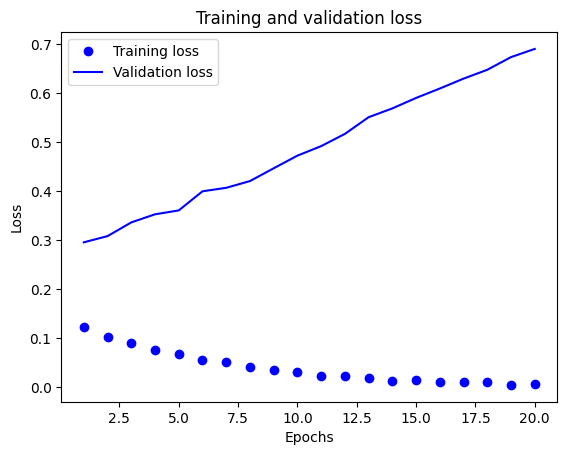

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

График точности

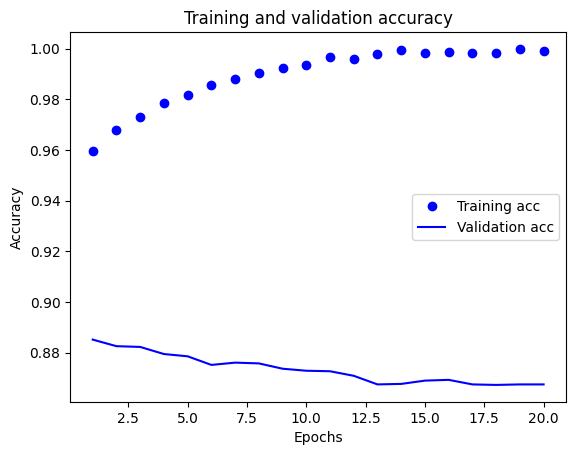

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Обучение модели в течение 4 эпох и оценка ее качества на тестовой выборке

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4917 - accuracy: 0.8122
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2932 - accuracy: 0.8980
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2283 - accuracy: 0.9170
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2925 - accuracy: 0.8809


In [ ]:
results

[0.292546808719635, 0.8809199929237366]

Получение прогноза на новых данных, не имеющих эталона

In [ ]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.1638726 ],
       [0.9993506 ],
       [0.6875635 ],
       ...,
       [0.06243258],
       [0.07170293],
       [0.50366056]], dtype=float32)

#Домашнее задание:

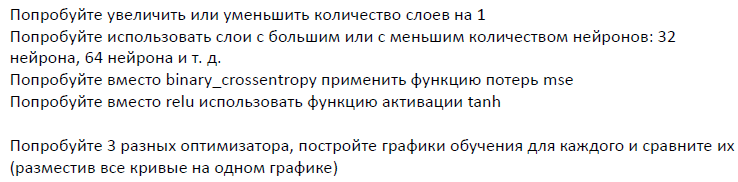

---
1. Изменим количество слоев

Увеличим количество слоев

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    
    layers.Dense(16, activation="relu"),

    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val1 = x_train[:10000]
partial_x_train1 = x_train[10000:]
y_val1 = y_train[:10000]
partial_y_train1 = y_train[10000:]

In [ ]:
history1 = model1.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2231 - accuracy: 0.9456
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1294 - accuracy: 0.9608
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0952 - accuracy: 0.9710
Epoch 4/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0759 - accuracy: 0.9772


In [ ]:
results1 = model1.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.7131 - accuracy: 0.8591


Уменьшим количество слоев

In [ ]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model2.fit(x_train, y_train, epochs=4, batch_size=512)
results2 = model2.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.4617 - accuracy: 0.8226
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2951 - accuracy: 0.8970
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2384 - accuracy: 0.9167
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2772 - accuracy: 0.8900


**Выводы:**

без изменений количества такие результаты -  loss: 0.3015 - accuracy: 0.8774

при увеличении количества слоев - loss: 0.0759 - accuracy: 0.9772

при уменьшении количества слоев - loss: 0.2772 - accuracy: 0.8900

---
2.
Изменим количество нейронов

Увеличим в 2 раза

In [ ]:
model3 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model3.fit(x_train, y_train, epochs=4, batch_size=512)
results3 = model3.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 19ms/step - loss: 0.4554 - accuracy: 0.8055
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2610 - accuracy: 0.9016
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2062 - accuracy: 0.9237
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3234 - accuracy: 0.8738


Увеличим в 4 раза

In [ ]:
model4 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model4.fit(x_train, y_train, epochs=4, batch_size=512)
results4 = model4.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4433 - accuracy: 0.8044
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2604 - accuracy: 0.8981
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2101 - accuracy: 0.9203
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2921 - accuracy: 0.8844


Уменьшим в 2 раза

In [ ]:
model4 = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model4.fit(x_train, y_train, epochs=4, batch_size=512)
results4 = model4.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.5112 - accuracy: 0.7945
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.3048 - accuracy: 0.9006
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2303 - accuracy: 0.9219
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2840 - accuracy: 0.8868


Выводы:

без изменений количества такие результаты - loss: 0.3015 - accuracy: 0.8774

при увеличении в 2 раза количества слоев - loss: 0.3234 - accuracy: 0.8738

при увеличении в 4 раза количества слоев - loss: 0.2921 - accuracy: 0.8844

при уменьшении количества слоев - loss: 0.2840 - accuracy: 0.8868

In [ ]:
model5 = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model5.fit(x_train, y_train, epochs=4, batch_size=512)
results5 = model5.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.5740 - accuracy: 0.7870
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.3819 - accuracy: 0.8786
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2868 - accuracy: 0.9022
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2885 - accuracy: 0.8843


In [ ]:
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model5.fit(x_train, y_train, epochs=4, batch_size=512)
results5 = model5.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.4865 - accuracy: 0.8075
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2874 - accuracy: 0.9035
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2227 - accuracy: 0.9222
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2795 - accuracy: 0.8878


---
3.
Заменим функцию потерь

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model6 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model6.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model6.fit(x_train, y_train, epochs=4, batch_size=512)
results6 = model6.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.1611 - accuracy: 0.7990
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0896 - accuracy: 0.8969
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.0706 - accuracy: 0.9163
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.0852 - accuracy: 0.8850


binary - loss: 0.3015 - accuracy: 0.8774

mse    - loss: 0.0852 - accuracy: 0.8850

Функция потерь уменьшилась

---
4.
Изменим функцию активации

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.4537 - accuracy: 0.8189
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2640 - accuracy: 0.9049
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.1990 - accuracy: 0.9259
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3085 - accuracy: 0.8784


binary - loss: 0.3015 - accuracy: 0.8774

loss: 0.3085 - accuracy: 0.8784

Ничего не поменялась

---
5.
График

optimizer:

SGD

RMSprop

Adam

AdamW

Adadelta

Adagrad

Adamax

Adafactor

Nadam

Ftrl

In [ ]:
model7 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model7.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history7 = model7.fit(x_train, y_train, epochs=4, batch_size=512)
results7 = model7.evaluate(x_test, y_test)

history_dict7 = history7.history

Epoch 1/4
49/49 [==============================] - 1s 18ms/step - loss: 0.4744 - accuracy: 0.8109
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2766 - accuracy: 0.9012
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2176 - accuracy: 0.9185
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3090 - accuracy: 0.8750


In [ ]:

history_dict7.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
model8 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model8.compile(optimizer="sgd",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history8 = model8.fit(x_train, y_train, epochs=4, batch_size=512)
results8 = model8.evaluate(x_test, y_test)

history_dict8 = history8.history


Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.6910 - accuracy: 0.5170
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.6842 - accuracy: 0.5678
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.6733 - accuracy: 0.6215
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.6481 - accuracy: 0.7020


In [ ]:
model9 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model9.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history9 = model9.fit(x_train, y_train, epochs=4, batch_size=512)
results9 = model9.evaluate(x_test, y_test)

history_dict9 = history9.history


Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4780 - accuracy: 0.8096
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2461 - accuracy: 0.9117
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1811 - accuracy: 0.9351
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3167 - accuracy: 0.8780


---

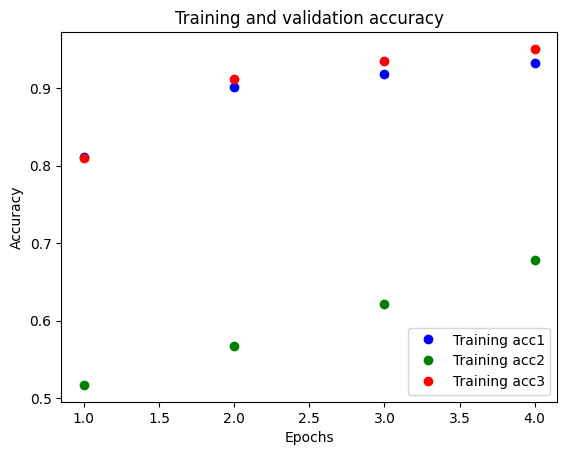

In [ ]:
import matplotlib.pyplot as plt
plt.clf()


acc7 = history_dict7["accuracy"]

acc8 = history_dict8["accuracy"]

acc9 = history_dict9["accuracy"]

epochs = range(1, len(acc7 ) + 1)

plt.plot(epochs, acc7, "bo", label="Training acc1")

plt.plot(epochs, acc8, "go", label="Training acc2")

plt.plot(epochs, acc9, "ro", label="Training acc3")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

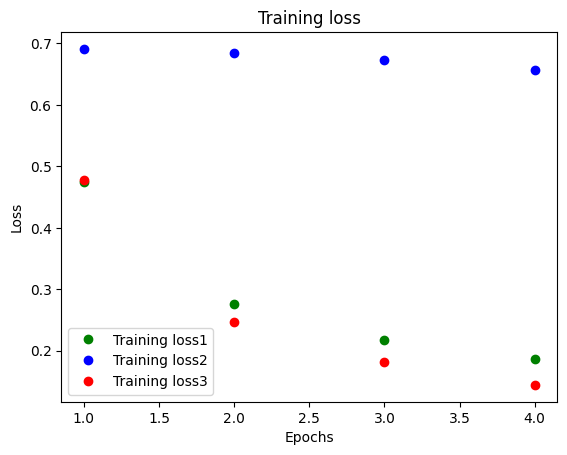

In [ ]:
import matplotlib.pyplot as plt

loss_values7 = history_dict7["loss"]
loss_values8 = history_dict8["loss"]
loss_values9 = history_dict9["loss"]
epochs = range(1, len(loss_values7) + 1)

plt.plot(epochs, loss_values7, "go", label="Training loss1")

plt.plot(epochs, loss_values8, "bo", label="Training loss2")

plt.plot(epochs, loss_values9, "ro", label="Training loss3")

plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()